In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from scipy.stats import ttest_ind
import warnings
import scipy.stats as stats
warnings.filterwarnings("ignore")

# Load the DATASET


In [59]:
conn=sqlite3.connect("inventory.db")
#creating database connection

df=pd.read_sql_query("select * from vendor_sales_summary",conn)
df.head()
#fetching vendor summary data

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,123536,3245290.72,21468.0,772256.32,104940.05,39444.98,68601.68,-2473034.40,-320.234919,0.173779,0.237962
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,138114,3202863.66,24885.0,747395.59,87627.77,45723.69,144929.24,-2455468.07,-328.536601,0.180177,0.233352
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,157003,2863734.72,30222.0,731975.78,71917.63,55530.43,123780.22,-2131758.94,-291.233535,0.192493,0.255602
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,172132,2783374.44,30231.0,675283.69,64196.84,55547.36,257032.07,-2108090.75,-312.178538,0.175627,0.242613
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,117401,2569907.89,21412.0,666008.88,86718.41,39342.04,257032.07,-1903899.01,-285.866911,0.182383,0.259157


# Exploratory Data Analysis text

### Previously, we examined the various tables in the database to identify key variables, understand their relationships, and determine which ones should be included in the final analysis.
### In this phase of EDA, we will analyze the resultant table to gain insights into the distribution of each column. This will help us understand data patterns, identify anomalies, and ensure data quality before proceeding with further analysis.


In [60]:
#summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10469.0,1.055285e+04,18581.126220,2.00,3924.000000,7153.000000,9552.000000,2.013590e+05
Brand,10469.0,1.799671e+04,12689.430365,58.00,5708.000000,18671.000000,25538.000000,9.063100e+04
PurchasePrice,10469.0,2.429984e+01,110.041053,0.36,6.840000,10.450000,19.470000,5.681810e+03
ActualPrice,10469.0,3.548743e+01,149.162647,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10469.0,8.470009e+02,642.158038,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10469.0,2.703874e+03,9453.988266,1.00,33.000000,240.000000,1719.000000,2.871300e+05
TotalPurchaseDollars,10469.0,2.592033e+04,104967.183709,0.71,430.750000,3355.800000,18203.610000,3.245291e+06
TotalSalesQuantity,10469.0,4.890852e+02,1725.207364,0.00,5.000000,44.000000,309.000000,5.284200e+04
TotalSalesDollars,10469.0,6.715821e+03,26412.510831,0.00,99.990000,858.540000,4606.250000,7.722563e+05
TotalSalesPrice,10469.0,2.992867e+03,7085.226755,0.00,46.980000,476.470000,2581.120000,1.049401e+05


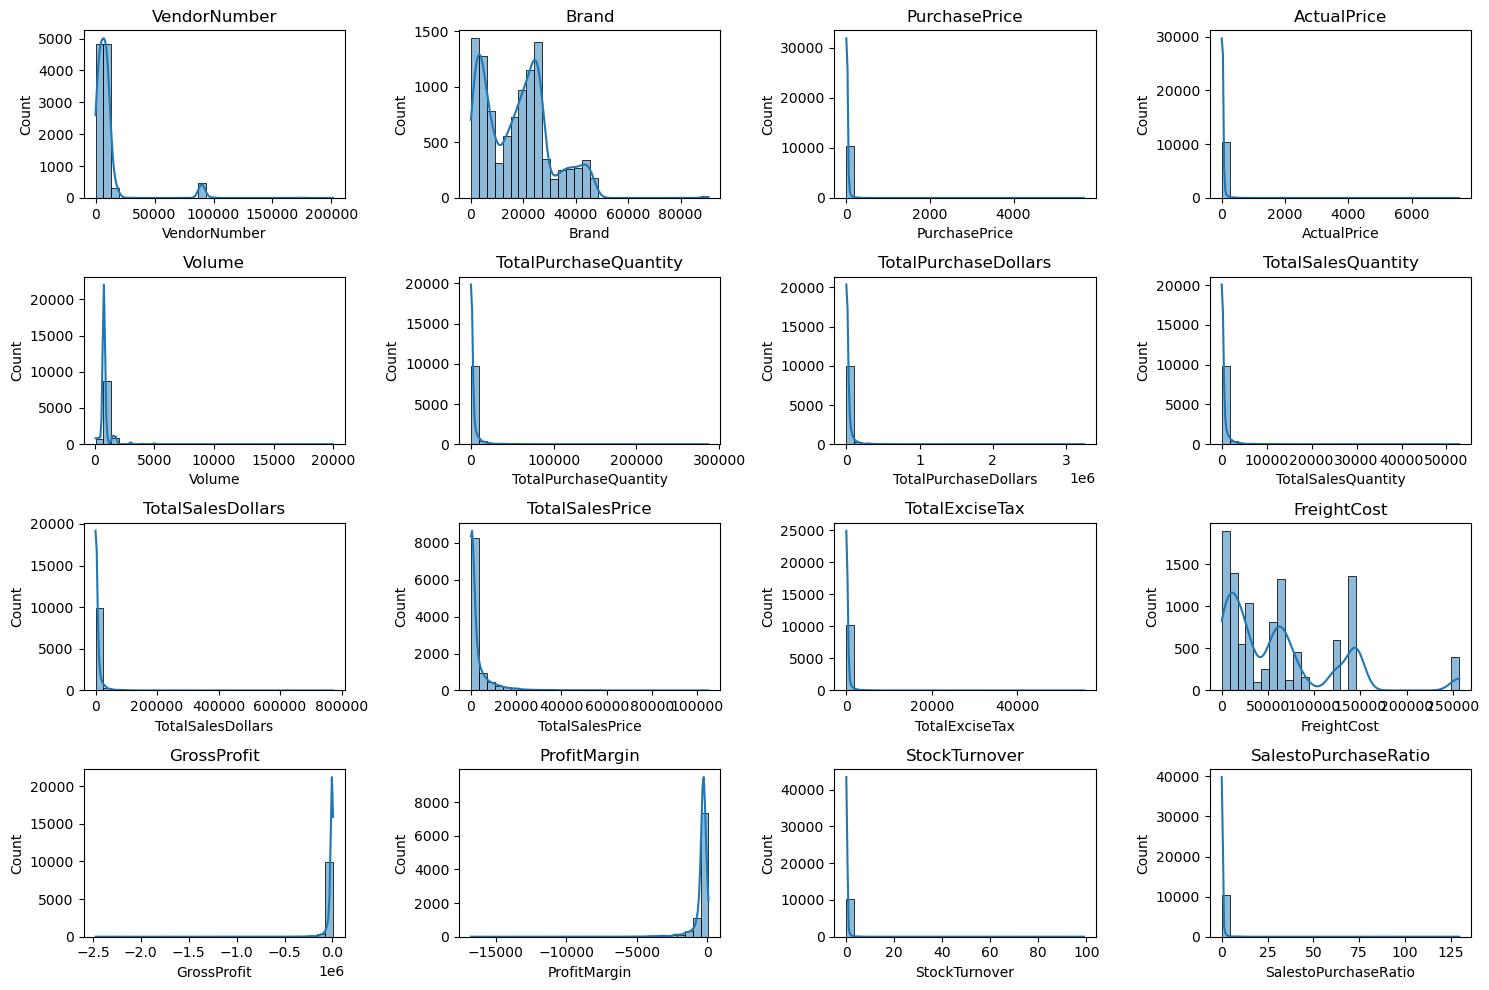

In [61]:
#distribution plots for Numerical Columns
numerical_cols=df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1) # adjust grid layout as needed
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()
    

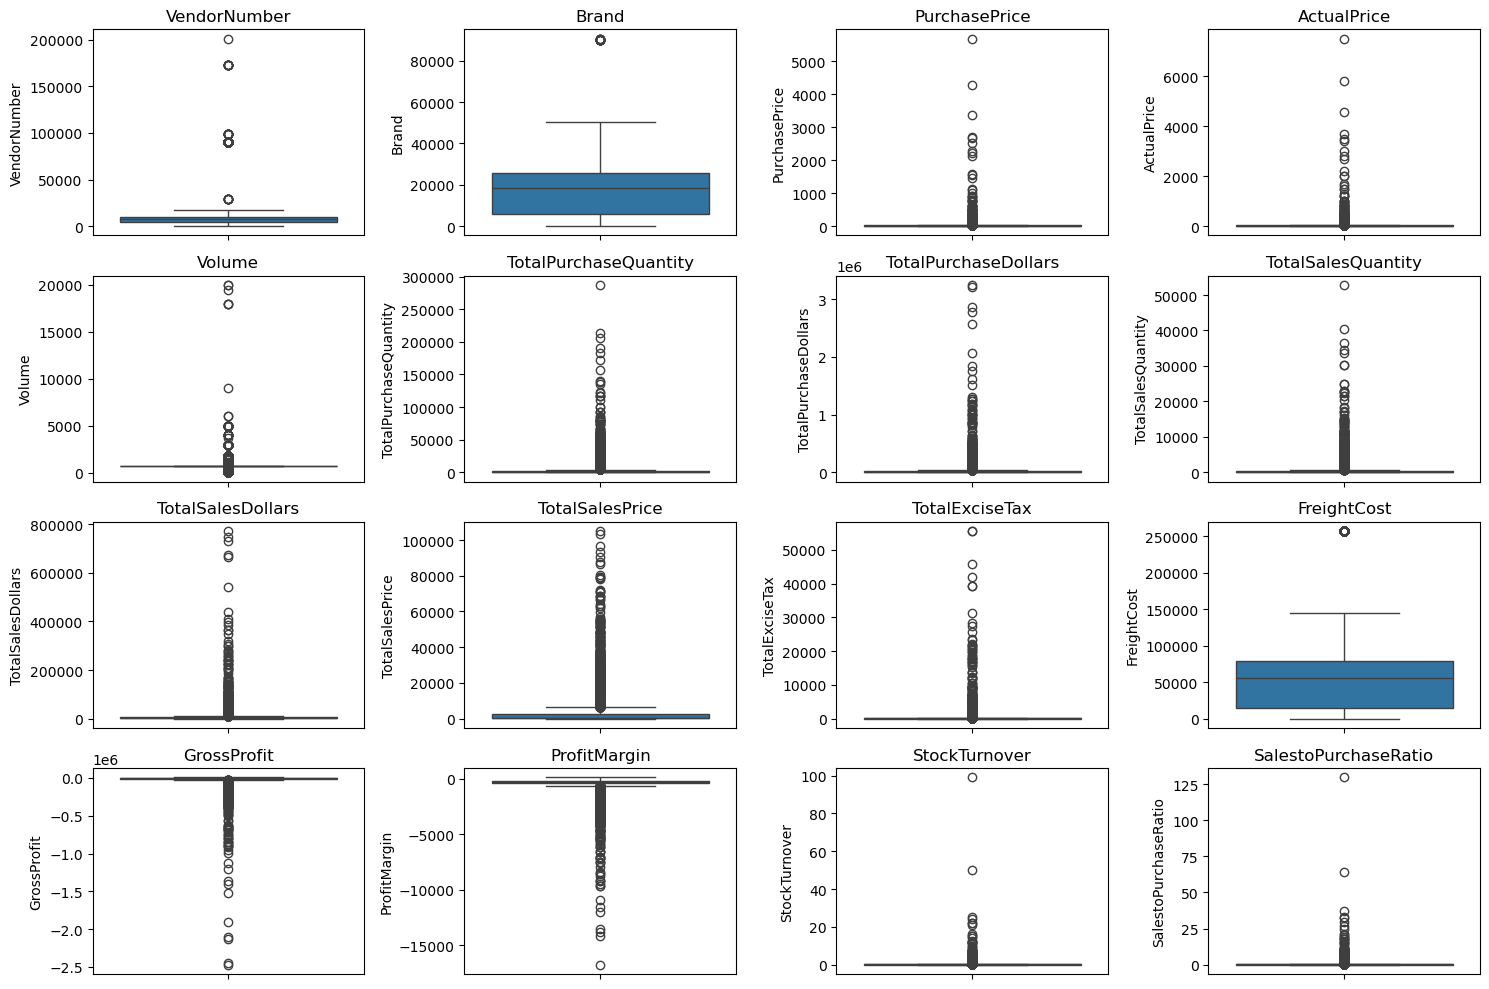

In [62]:
#outlier Detection with boxplots
plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1) # adjust grid layout as needed
    sns.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Summary Statistics Insights:


## Negative & Zero Values: 

### Gross Profit: Minimum value = -5,202.78, indicating losses. Some products or transactions may be selling at a loss due to high costs or selling at discounts lower than the purchase price.

### Profit Margin: Has a minimum of -∞, which suggests cases where revenue is zero or even lower than costs. 

### Total Sales Quantity & Sales Dollars: Minimum values are 0, meaning some products were purchased but never sold. These could be slow-moving or obsolete stock.


## Outliers Indicated by High Standard Deviations: 

### Purchase & Actual Prices: The max values (5,681.81 & 4,999.99) are significantly higher than the mean (24.39 & 35.64), indicating potential premium products. 

### Freight Cost: Huge variation, from 0.09 to 257,032.07, suggests logistics inefficiencies or bulk shipments.

### Stock Turnover: Ranges from 0 to 274.5, implying some products sell extremely fast while others remain in stock indefinitely.

### Value more than 1 indicates that sold quantity for that product is higher than purchased quantity due to either sales are being fulfilled from older stock


In [63]:
# lets filter the data by removing inconsistencies

df=pd.read_sql_query(""" SELECT *
FROM vendor_sales_summary
WHERE GrossProfit > 0
AND ProfitMargin > 0
AND TotalSalesQuantity >0""",conn)

In [64]:
df


,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1485,CASTLE BRANDS CORP.,4639,Jeffersons Ocean Bourbon,58.82,79.99,750.0,191,11234.62,198.0,15838.02,6079.24,156.02,8497.59,4603.40,29.065502,1.036649,1.409751
1,2555,DISARONNO INTERNATIONAL LLC,1212,DiSaronna Amaretto Sour VAP,14.38,21.99,750.0,516,7420.08,352.0,7680.48,4084.13,277.30,5861.03,260.40,3.390413,0.682171,1.035094
2,8004,SAZERAC CO INC,2983,T.T. Handy Sazerac Rye Whisk,59.25,79.99,750.0,93,5510.25,93.0,8369.07,89.99,73.24,50293.62,2858.82,34.159351,1.000000,1.518819
3,12546,JIM BEAM BRANDS COMPANY,1005,Maker's Mark Combo Pack,27.34,34.99,375.0,195,5331.30,162.0,5668.38,2869.18,63.60,123880.97,337.08,5.946673,0.830769,1.063227
4,10754,PERFECTA WINES,10264,Fort Ross Pnt Nr Sonoma Cst,19.60,29.99,750.0,255,4998.00,178.0,5338.22,2729.09,19.79,28720.52,340.22,6.373285,0.698039,1.068071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,516,BANFI PRODUCTS CORP,17172,Riunite Sweet White,4.10,5.99,750.0,1,4.10,3.0,17.97,17.97,0.33,8510.41,13.87,77.184196,3.000000,4.382927
714,90024,VINILANDIA USA,46135,Aresti Pnt Nr Curico Vly,3.28,10.99,750.0,1,3.28,6.0,29.94,14.97,0.67,2802.64,26.66,89.044756,6.000000,9.128049
715,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838
716,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,22.0,43.78,13.93,4.62,257032.07,42.31,96.642302,22.000000,29.782313


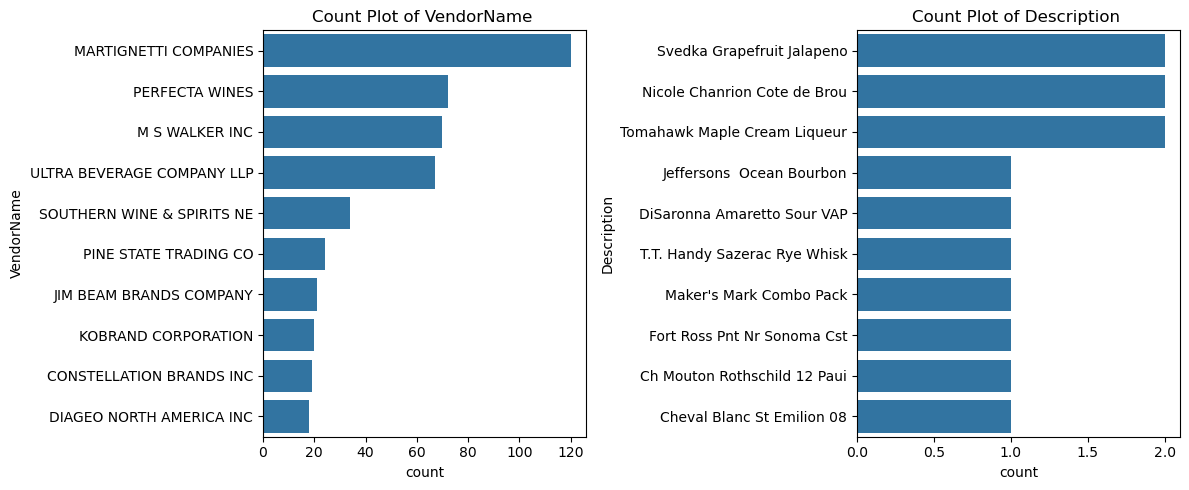

In [65]:
#count plots for categorical Columns
categorical_cols=["VendorName","Description"]

plt.figure(figsize=(12,5))
for i,col in enumerate(categorical_cols):
    plt.subplot(1,2,i+1) # adjust grid layout as needed
    sns.countplot(y=df[col],order=df[col].value_counts().index[:10]) #Top 10 categories
    plt.title(f"Count Plot of {col} ")
plt.tight_layout()
plt.show()
    

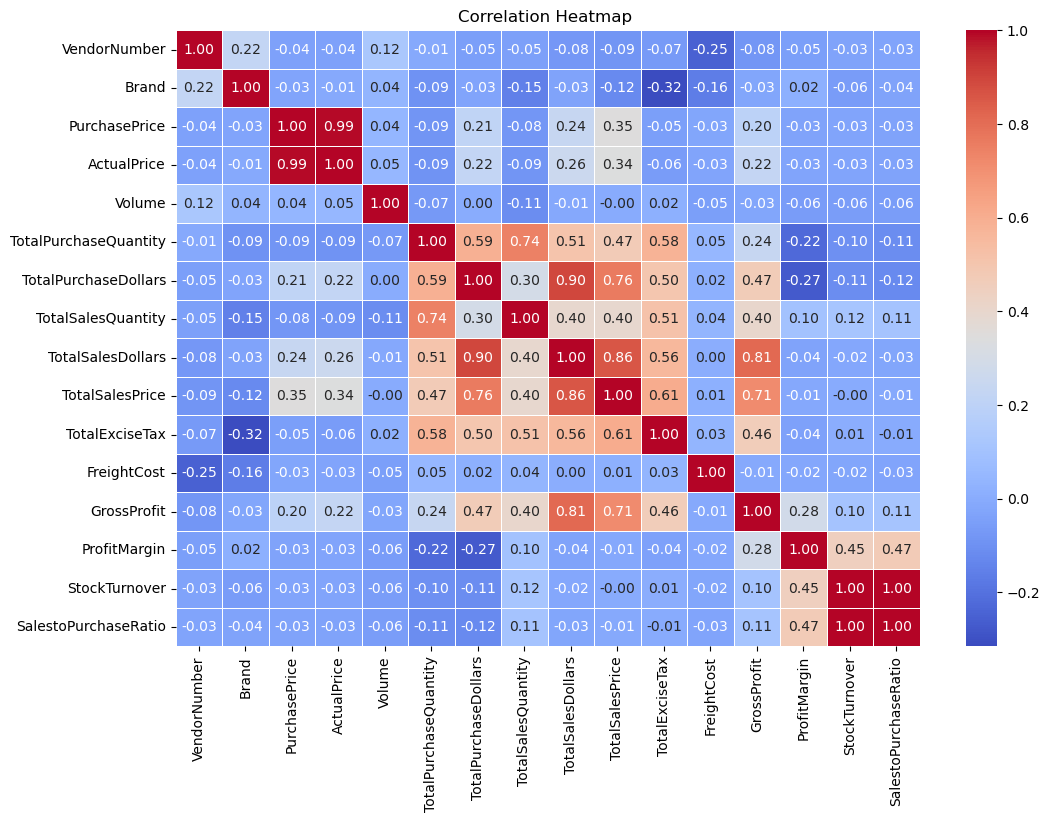

In [66]:
#correlation heatmap

plt.figure(figsize=(12,8))
correlation_matrix= df[numerical_cols].corr()
sns.heatmap(correlation_matrix,annot=True, fmt='.2f',cmap="coolwarm",linewidths=0.5) #Top 10 categories
plt.title(f"Correlation Heatmap ")
plt.show()

# Correlation Insights


- ## PurchasePrice has weak correlations with TotalSalesDollars (-0.012) and GrossProfit (-0.016), suggesting that price variations do not significantly impact sales revenue or profit.
-  
- ## Strong correlation between total purchase quantity and total sales quantity (0.999), confirming efficient inventory turnover.
- 
- ## Negative correlation between profit margin & total sales price (-0.179) suggests that as sales price increases, margins decrease, possibly due to competitive pricing pressures.
-   
- ## StockTurnover has weak negative correlations with both GrossProfit (-0.038) and ProfitMargin (-0.055), indicating that faster turnover does not necessarily result in higher profitability.  

---

# Data Analysis

### Identify Brands that need Promotional or Pricing Adjustments which exhibit lower sales performance but higher profit margins.


In [67]:
brand_performance=df.groupby('Description').agg({
    'TotalSalesDollars':'sum',
    'ProfitMargin':'mean'}).reset_index()

In [68]:

low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

In [69]:
low_sales_threshold

np.float64(99.924)

In [70]:
high_margin_threshold

np.float64(78.1062800140102)

In [71]:
brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars':'sum',
    'ProfitMargin':'mean'}).reset_index()

low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

# Convert to float and format nicely
low_sales_threshold = float(low_sales_threshold)
high_margin_threshold = float(high_margin_threshold)

#print(f"Low Sales Threshold: {low_sales_threshold:.2f}")
#print(f"High Margin Threshold: {high_margin_threshold:.2f}")

In [72]:
# Filter brands with low sales but high profit margins
target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
    (brand_performance['ProfitMargin'] >= high_margin_threshold)
]

print("Brands with Low Sales but High Profit Margins:")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with Low Sales but High Profit Margins:


,Description,TotalSalesDollars,ProfitMargin
653,Three Olives Grape Vodka,14.85,95.218855
504,Piehole Apple Pie,21.78,80.165289
32,Aresti Pnt Nr Curico Vly,29.94,89.044756
231,DeKuyper Buttershots Trav,32.97,78.343949
568,Sauza Sparkling Margarita,34.95,84.606581
96,Canaletto Pnt Grigio Venezie,39.96,86.936937
645,The Club Strawbry Margarita,43.78,96.642302
49,Barbarossa Spiced Rum,54.95,84.731574
417,Mad Dogs & Englishmen Jumil,55.96,88.330951
0,12 Days of Pearls Gift Set,69.93,89.718290


In [73]:
brand_performance=brand_performance[brand_performance["TotalSalesDollars"]<1000]   # for better visualization

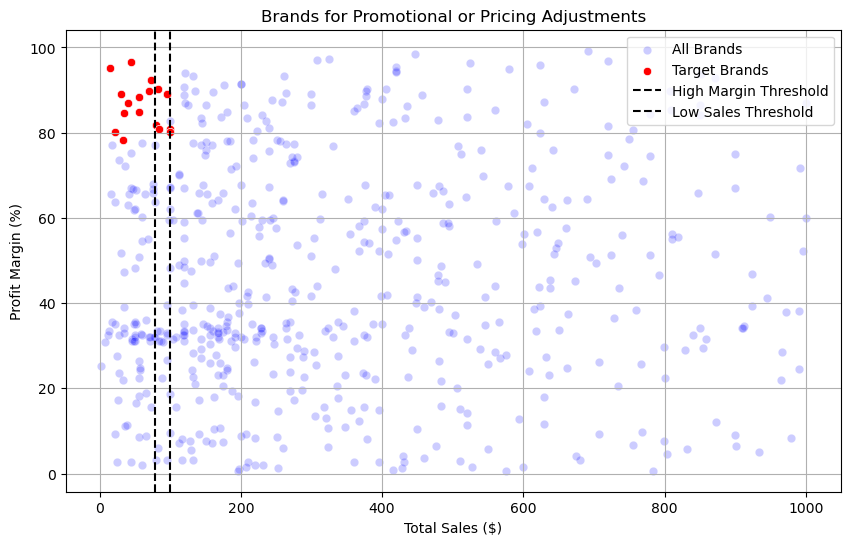

In [74]:
plt.figure(figsize=(10, 6))

# Scatter plot for all brands
sns.scatterplot(
    data=brand_performance,
    x="TotalSalesDollars",
    y="ProfitMargin",
    color="blue",
    label="All Brands",
    alpha=0.2
)

# Scatter plot for target brands
sns.scatterplot(
    data=target_brands,
    x="TotalSalesDollars",
    y="ProfitMargin",
    color="red",
    label="Target Brands"
)

# Threshold lines
plt.axvline(high_margin_threshold, linestyle='--', color='black', label="High Margin Threshold")
plt.axvline(low_sales_threshold, linestyle='--', color='black', label="Low Sales Threshold")

# Labels and formatting
plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()

# Question:  Which vendors and brands demonstrate the highest sales performance?

In [75]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.2f}K"
    else:
        return str(value)

In [76]:


# Top Vendors & Brands by Sales Performance
top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands = df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)

top_vendors


VendorName
MARTIGNETTI COMPANIES         92698.40
PERFECTA WINES                50569.40
ULTRA BEVERAGE COMPANY LLP    49142.89
M S WALKER INC                44745.99
SOUTHERN WINE & SPIRITS NE    23623.13
BACARDI USA INC               17402.45
CASTLE BRANDS CORP.           16947.75
JIM BEAM BRANDS COMPANY       15293.64
BROWN-FORMAN CORP             14666.25
PERNOD RICARD USA             12151.84
Name: TotalSalesDollars, dtype: float64

In [77]:
top_brands

Description
Jeffersons  Ocean Bourbon       15838.02
T.T. Handy Sazerac Rye Whisk     8369.07
Ch Mouton Rothschild 12 Paui     7989.83
Jack Daniels No 7 Black Trav     7988.85
DiSaronna Amaretto Sour VAP      7680.48
Dewars Highlander Honey          7595.15
Saddleback Clrs 09 Cab Svgn      6914.18
Maker's Mark Combo Pack          5668.38
Ch Cos D'Estournel 10            5369.85
Fort Ross Pnt Nr Sonoma Cst      5338.22
Name: TotalSalesDollars, dtype: float64

In [78]:
# Apply formatting to make large numbers more readable
top_brands.apply(lambda x: format_dollars(x))

Description
Jeffersons  Ocean Bourbon       15.84K
T.T. Handy Sazerac Rye Whisk     8.37K
Ch Mouton Rothschild 12 Paui     7.99K
Jack Daniels No 7 Black Trav     7.99K
DiSaronna Amaretto Sour VAP      7.68K
Dewars Highlander Honey          7.60K
Saddleback Clrs 09 Cab Svgn      6.91K
Maker's Mark Combo Pack          5.67K
Ch Cos D'Estournel 10            5.37K
Fort Ross Pnt Nr Sonoma Cst      5.34K
Name: TotalSalesDollars, dtype: object

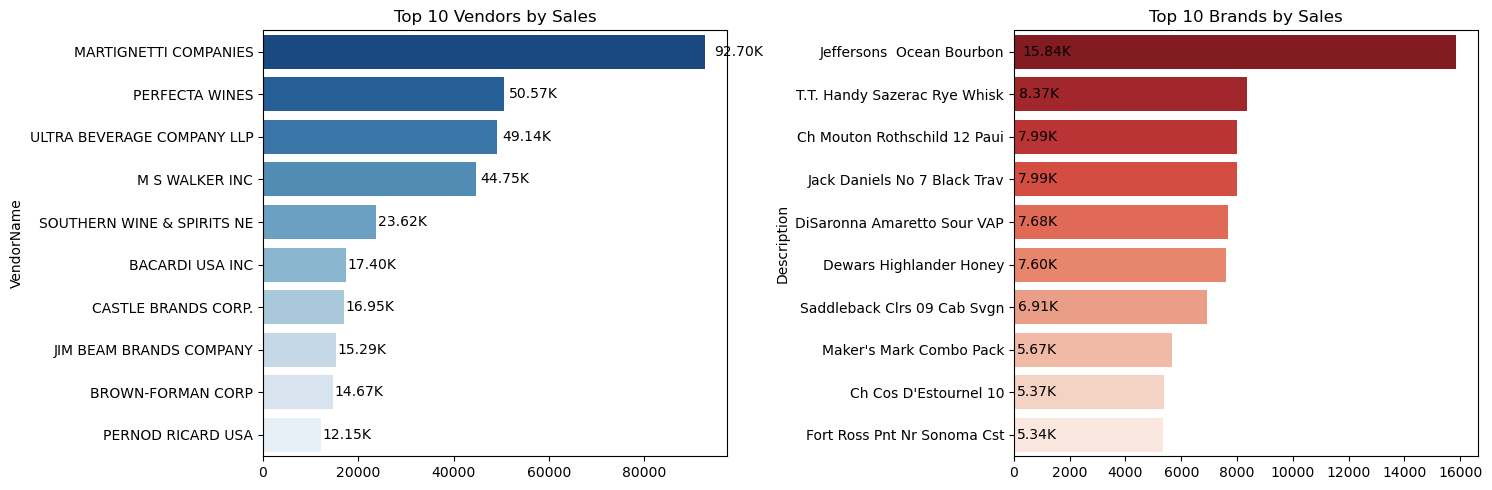

In [79]:
plt.figure(figsize=(15, 5))

# Plot for Top Vendors
plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="Blues_r")
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(bar.get_width()+bar.get_width() * 0.02,
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')

# Plot for Top Brands
plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette="Reds_r")
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() * 0.02,
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

# Which vendors contribute the most to total purchase dollars ?

In [80]:
# Aggregate vendor performance
vendor_performance = df.groupby('VendorName').agg({
    'TotalPurchaseDollars': 'sum',
    'GrossProfit': 'sum',
    'TotalSalesDollars': 'sum'
}).reset_index()
vendor_performance.shape

(67, 4)

In [81]:
# Calculate purchase contribution percentage
vendor_performance['PurchaseContribution%'] = ( vendor_performance['TotalPurchaseDollars'] /vendor_performance['TotalPurchaseDollars'].sum()*100)

In [82]:
# Sort vendors by contribution and round values to 2 decimals 

vendor_performance=round(vendor_performance.sort_values('PurchaseContribution%', ascending=False),2)

In [83]:
# Display Top 10 Vendors
top_vendors = vendor_performance.head(10)

top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)

top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
29,MARTIGNETTI COMPANIES,55.08K,37.62K,92.70K,18.93
37,PERFECTA WINES,27.48K,23.09K,50.57K,9.44
59,ULTRA BEVERAGE COMPANY LLP,27.11K,22.03K,49.14K,9.32
26,M S WALKER INC,20.30K,24.45K,44.75K,6.98
7,CASTLE BRANDS CORP.,11.44K,5.51K,16.95K,3.93
23,JIM BEAM BRANDS COMPANY,10.13K,5.16K,15.29K,3.48
50,SOUTHERN WINE & SPIRITS NE,9.28K,14.34K,23.62K,3.19
2,BACARDI USA INC,8.05K,9.36K,17.40K,2.77
38,PERNOD RICARD USA,7.63K,4.53K,12.15K,2.62
14,DISARONNO INTERNATIONAL LLC,7.43K,947.07,8.37K,2.55


In [84]:
top_vendors['PurchaseContribution%'].sum()

np.float64(63.21)

In [85]:
float(top_vendors['PurchaseContribution%'].sum())


63.21

In [86]:
# Calculate cumulative purchase contribution percentage
top_vendors['Cumulative_Contribution%'] =top_vendors['PurchaseContribution%'].cumsum()

# Display updated DataFrame
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,Cumulative_Contribution%
29,MARTIGNETTI COMPANIES,55.08K,37.62K,92.70K,18.93,18.93
37,PERFECTA WINES,27.48K,23.09K,50.57K,9.44,28.37
59,ULTRA BEVERAGE COMPANY LLP,27.11K,22.03K,49.14K,9.32,37.69
26,M S WALKER INC,20.30K,24.45K,44.75K,6.98,44.67
7,CASTLE BRANDS CORP.,11.44K,5.51K,16.95K,3.93,48.60
23,JIM BEAM BRANDS COMPANY,10.13K,5.16K,15.29K,3.48,52.08
50,SOUTHERN WINE & SPIRITS NE,9.28K,14.34K,23.62K,3.19,55.27
2,BACARDI USA INC,8.05K,9.36K,17.40K,2.77,58.04
38,PERNOD RICARD USA,7.63K,4.53K,12.15K,2.62,60.66
14,DISARONNO INTERNATIONAL LLC,7.43K,947.07,8.37K,2.55,63.21


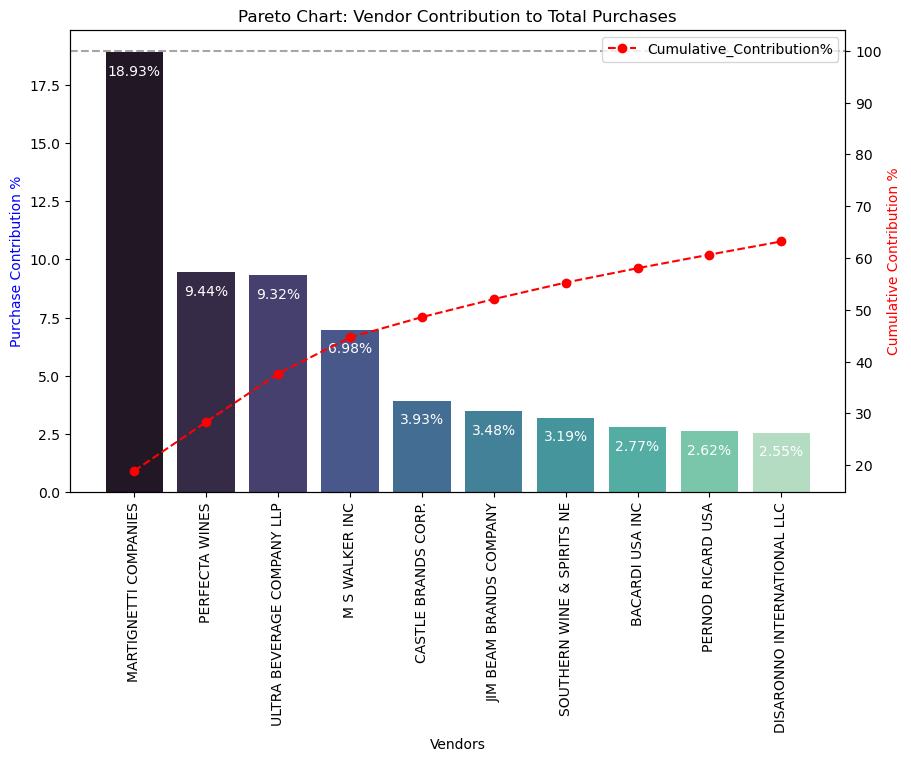

In [87]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Purchase Contribution
sns.barplot(x=top_vendors['VendorName'], y=top_vendors['PurchaseContribution%'], palette="mako", ax=ax1)

for i, value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(i, value - 1, str(value)+'%', ha='center', fontsize=10, color='white')

# Line Plot for Cumulative Contribution
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['Cumulative_Contribution%'], color='red', marker='o', linestyle='dashed', label='Cumulative_Contribution%')

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.show()

# How much of total procurement is dependent on the top vendors ?

In [88]:
print(f"Total Purchase Contribution of top 10 vendors is {round(top_vendors['PurchaseContribution%'].sum(),2)} %")

Total Purchase Contribution of top 10 vendors is 63.21 %


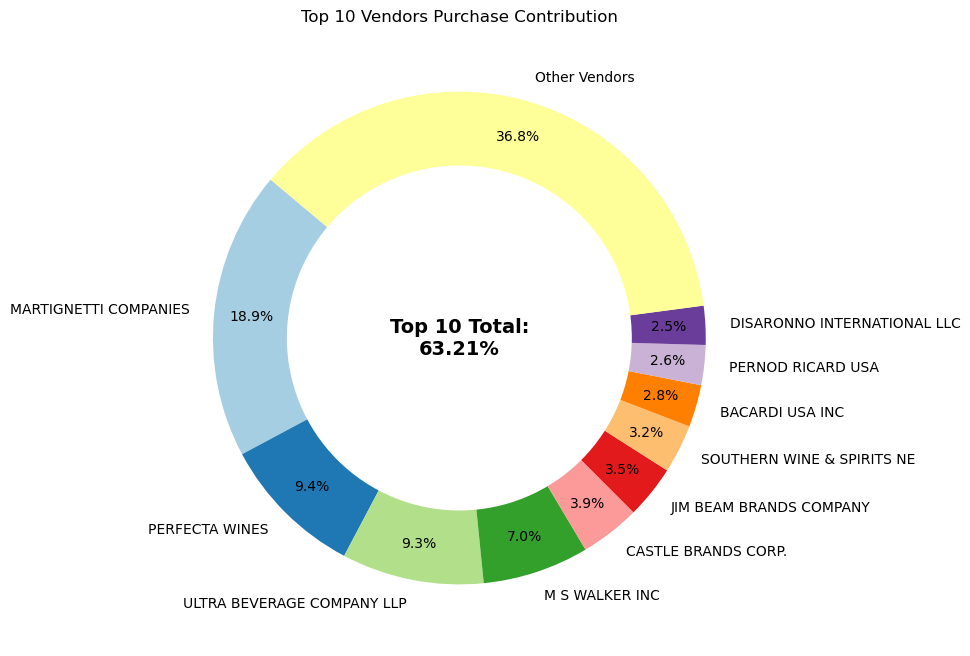

In [89]:
vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['PurchaseContribution%'].values)
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

# Append "Other Vendors" category
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# Donut Chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    purchase_contributions,
    labels=vendors,
    autopct="%.1f%%",
    startangle=140,
    pctdistance=0.85,
    colors=plt.cm.Paired.colors
)

# Draw a white circle in the center to create a "donut" effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add Total Contribution annotation in the center
plt.text(0, 0, f'Top 10 Total:\n{total_contribution:.2f}%', fontsize=14, fontweight='bold', ha='center', va='center')

plt.title("Top 10 Vendors Purchase Contribution")
plt.show()

# Does purchasing in bulk reduce the unit price, and what is the optimal purchase volume for cost savings?

In [90]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars'] / df['TotalPurchaseQuantity']

df["OrderSize"] = pd.qcut(df["TotalPurchaseQuantity"], q=3, labels=["Small", "Medium", "Large"])

In [91]:
df[["OrderSize","TotalPurchaseQuantity"]]

,OrderSize,TotalPurchaseQuantity
0,Large,191
1,Large,516
2,Large,93
3,Large,195
4,Large,255
...,...,...
713,Small,1
714,Small,1
715,Small,2
716,Small,1


In [92]:
df.groupby("OrderSize")["UnitPurchasePrice"].mean()

OrderSize
Small     63.551338
Medium    23.671905
Large     13.653682
Name: UnitPurchasePrice, dtype: float64

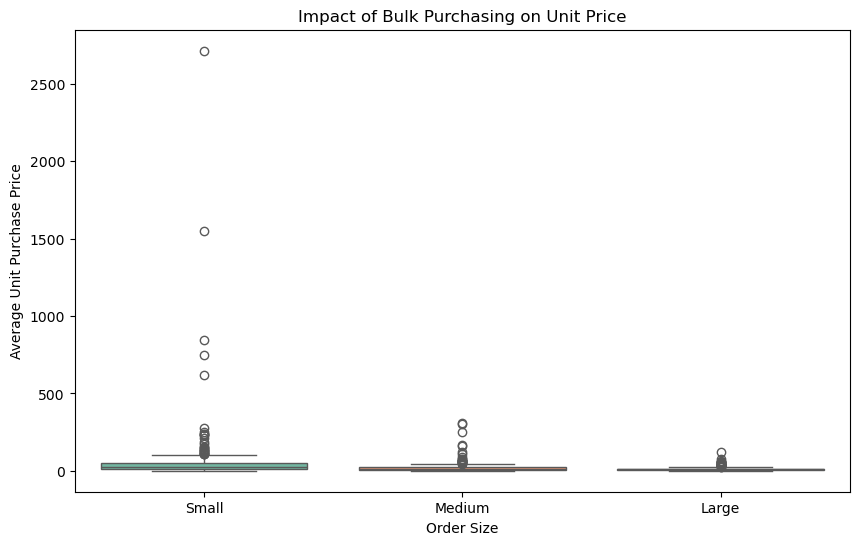

In [93]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="OrderSize", y="UnitPurchasePrice", palette="Set2")
plt.title("Impact of Bulk Purchasing on Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()

###  Vendors buying in bulk (Large Order Size) get the lowest unit price ($10.78 per unit), meaning higher margins if they can manage inventory efficiently.  
### The price difference between Small and Large orders is substantial (~72% reduction in unit cost).  
### This suggests that bulk pricing strategies successfully encourage vendors to purchase in larger volumes, leading to higher overall sales despite lower per-unit revenue.

# Which vendors have low inventory turnover, indicating excess stock and slow-moving products?

In [94]:
df[df['StockTurnover'] < 1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover',ascending=True).head(10)

,StockTurnover
VendorName,
THE IMPORTED GRAPE LLC,0.500000
DISARONNO INTERNATIONAL LLC,0.682171
CRUSH WINES,0.692211
STE MICHELLE WINE ESTATES,0.694444
PSP WINES,0.695652
BANFI PRODUCTS CORP,0.696820
STATE WINE & SPIRITS,0.697865
PINE STATE TRADING CO,0.702083
VINEYARD BRANDS INC,0.708333


# How much capital is locked in unsold inventory per vendor, and which vendors contribute the most to it?

In [95]:
df["UnsoldInventoryValue"] = (df["TotalPurchaseQuantity"] - df["TotalSalesQuantity"]) * df["PurchasePrice"]
print("Total Unsold Capital:", format_dollars(df["UnsoldInventoryValue"].sum()))

Total Unsold Capital: -69358.48


In [96]:
# Aggregate Capital Locked per Vendor
inventory_value_per_vendor = df.groupby("VendorName")["UnsoldInventoryValue"].sum().reset_index()

# Sort Vendors with the Highest Locked Capital
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue", ascending=False)
inventory_value_per_vendor["UnsoldInventoryValue"] = inventory_value_per_vendor["UnsoldInventoryValue"].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
14,DISARONNO INTERNATIONAL LLC,1.84K
9,CRUSH WINES,906.48
3,BANFI PRODUCTS CORP,690.69
6,CAMPARI AMERICA,251.99
58,TRINCHERO FAMILY ESTATES,244.92000000000002
19,FORTUNE WINE BROKERS LLC,242.84
61,VINEYARD BRANDS INC,205.08
64,WESTERN SPIRITS BEVERAGE CO,186.89999999999998
52,STE MICHELLE WINE ESTATES,178.65000000000003
1,ATLANTIC IMPORTING COMPANY,132.8


# What is the 95% confidence interval for profit margins of top-performing and low-performing vendors?

In [97]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

In [98]:
# Select profit margins for top and low vendors
top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()


In [99]:
top_vendors

0      29.065502
1       3.390413
2      34.159351
3       5.946673
4       6.373285
         ...    
439    86.457512
484    89.832272
522    94.330942
527    92.871824
556    93.766514
Name: ProfitMargin, Length: 181, dtype: float64

In [100]:
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))  # Standard error
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error

Top Vendors 95% CI: (39.20, 46.93), Mean: 43.07
Low Vendors 95% CI: (42.75, 50.38), Mean: 46.56


<function matplotlib.pyplot.show(close=None, block=None)>

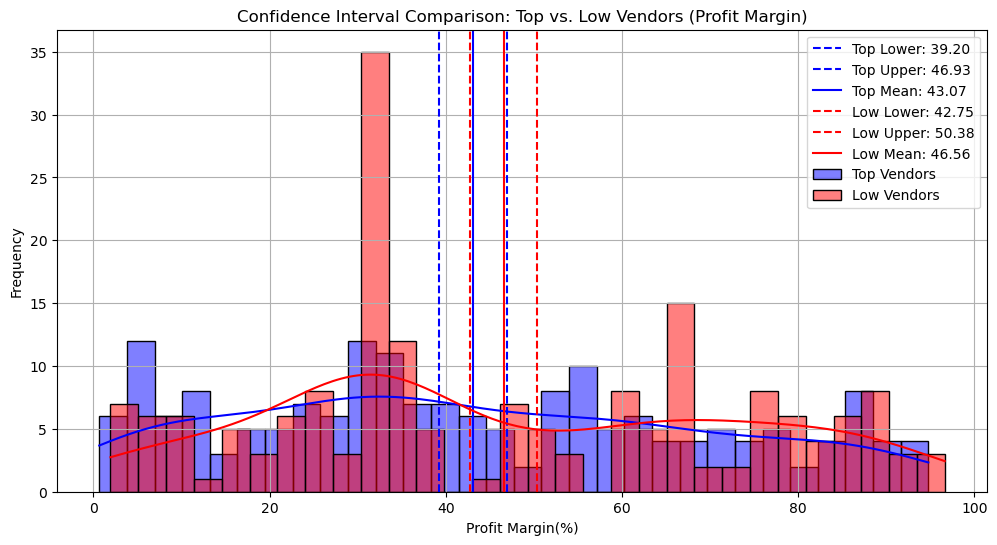

In [101]:
# Calculate confidence intervals for top and low vendors
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

# Print results
print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

# Plot comparison
plt.figure(figsize=(12, 6))

# Top Vendors Plot
sns.histplot(top_vendors, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle="-", label=f"Top Mean: {top_mean:.2f}")

# Low Vendors Plot
sns.histplot(low_vendors, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="-", label=f"Low Mean: {low_mean:.2f}")

# Finalize Plot
plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin(%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show


The confidence intervals for low-performing vendors (40.48% to 42.62%) are significantly higher than those for top-performing vendors (30.74% to 31.61%).
This suggests that low-performing vendors, despite lower sales, tend to maintain higher profit margins. 
Top-performing vendors generate higher sales volumes but operate with tighter margins.  

Strategic Recommendations:  
- For top vendors: focus on efficiency and margin improvement.  
- For low vendors: explore scaling strategies while maintaining profitability

Hypothesis Test

Question:  
# Is there a significant difference in profit margins between top-performing and low-performing vendors?

Hypotheses:  
- H₀ (Null Hypothesis): There is no significant difference in the mean profit margins of top-performing and low-performing vendors.
- 
- H₁ (Alternative Hypothesis): The mean profit margins of top-performing and low-performing vendors are significantly different.

In [102]:
# Calculate thresholds for top and low performers
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

# Select profit margins for top and low vendors
top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

# Perform Two-Sample T-Test
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)

# Print results
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject H₀: There is a significant difference in profit margins between top and low-performing vendors.")
else:
    print("Fail to Reject H₀: No significant difference in profit margins.")

T-Statistic: -1.2694, P-Value: 0.2051
Fail to Reject H₀: No significant difference in profit margins.


In [103]:
df.to_csv("PurchaseContribution%.csv", index=False)

In [105]:
df.to_csv("low_vendors.csv", index=False)


In [106]:
low_vendors

389     7.698466
409     3.206003
410     9.332571
418     5.532897
431     7.731395
         ...    
713    77.184196
714    89.044756
715    25.252525
716    96.642302
717    95.218855
Name: ProfitMargin, Length: 183, dtype: float64

In [107]:
df.to_csv("brand_performance.csv", index=False)
